In [33]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [34]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [35]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [36]:
%matplotlib inline

In [37]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(17646, 28)
(17646, 8)


# Multivariate Linear Regression (Foot prediction)

In [38]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
# Entries where RL is supporting
idxs = np.where(X_relative_footsteps_acc[:, 23] == 0)[0]
X_relative_footsteps_acc_RL_support = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_RL_support = Y_relative_footsteps_acc[idxs]

## Predict RL foot -> x

In [40]:
X_relative_footsteps_acc_RL_support[0, :]

array([ 0.        ,  0.        ,  0.        , -0.01667854,  0.02806931,
        0.04898649, -0.00293043,  0.04369139, -0.00966195,  0.22882891,
        0.16832004, -0.40987395,  0.23396882, -0.16832977, -0.40997042,
       -0.24291083,  0.16426133, -0.41338172, -0.24842681, -0.16367363,
       -0.41372354,  1.        ,  0.        ,  0.        ,  1.        ,
        0.1       ,  0.        ,  0.        ])

In [41]:
Y_relative_footsteps_acc_RL_support[0, :]

array([ 0.23372304,  0.17114156,  0.23612243, -0.16703353, -0.24142041,
        0.16586816, -0.24356714, -0.16141067])

### Linear Regression

In [47]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_support[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_x = LinearRegression()

# Fit the model
model_rl_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8850357623847762
RMSE:  0.005287765973170455
The lowest error is:  2.0799046729358395e-07
The highest error is:  0.0494842515613558
The avg. error is:  0.0027580469528186856


In [48]:
model_rl_relative_support_x.coef_

array([[-0.01194095, -0.00794009,  0.01966228,  0.10418998,  0.00152168,
        -0.00350107,  0.22513921, -0.08314183,  0.04495293,  0.06642451,
         0.41322877, -0.10597716,  0.07476767,  0.04744409]])

In [51]:
model_rl_relative_support_x.intercept_

array([-0.14169681])

Text(0, 0.5, 'Predictions')

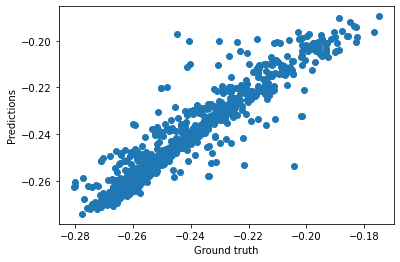

In [50]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [23]:
#%store model_rl_relative_support_x

In [24]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [25]:
# Save model
#joblib.dump(model_rl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_x.sav")

### Predict FL foot -> y

In [71]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_support[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_y = LinearRegression()

# Fit the model
model_rl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9322485676223601
RMSE:  0.00833761872758805
The lowest error is:  2.0336530274500664e-06
The highest error is:  0.06739334113975833
The avg. error is:  0.005546422146979035


In [72]:
model_rl_relative_support_y.coef_

array([[-0.0422973 , -0.02140077,  0.01396827,  0.00127373,  0.10205868,
         0.10537158,  0.06314382,  0.43674492,  0.08880562,  0.04639821,
         0.05681354,  0.47523043,  0.40734598, -0.04773779]])

In [75]:
model_rl_relative_support_y.intercept_

array([0.09497614])

Text(0, 0.5, 'Predictions')

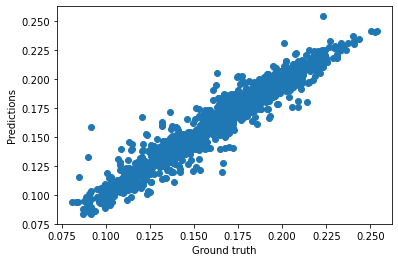

In [74]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [30]:
#%store model_rl_relative_support_y

In [31]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [32]:
# Save model
#joblib.dump(model_rl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_y.sav")